# Laboratory 6

## Dmytro Romaniv
### Student ID: 151958

In [6]:
#https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/phase-estimation-and-factoring
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector
from qiskit.quantum_info.operators import Operator
import math
from math import pi, cos, sin
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

theta = 0.7
m = 10  # Number of control qubits

control_register = QuantumRegister(m, name="Control")
target_register = QuantumRegister(1, name="|ψ>")
output_register = ClassicalRegister(m, name="Result")
qc = QuantumCircuit(control_register, target_register, output_register)

# Prepare the eigenvector |ψ>
qc.x(target_register)
qc.barrier()

# Perform phase estimation
for index, qubit in enumerate(control_register):
    qc.h(qubit)
    for _ in range(2**index):
        qc.cp(2 * pi * theta, qubit, target_register)
qc.barrier()

# Do inverse quantum Fourier transform
qc.compose(
    QFT(m, inverse=True),
    inplace=True
)

# Measure everything
qc.measure(range(m), range(m))
#display(qc.draw('mpl'))

/var/folders/rm/d82ssjc14tx1qqkdxrcl5qgm0000gp/T/ipykernel_69921/3358280104.py:33: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  QFT(m, inverse=True),


In [7]:
from qiskit.primitives import StatevectorSampler

job = StatevectorSampler().run([(qc,)])

pub_result = job.result()[0]

counts = pub_result.data.Result.get_counts()

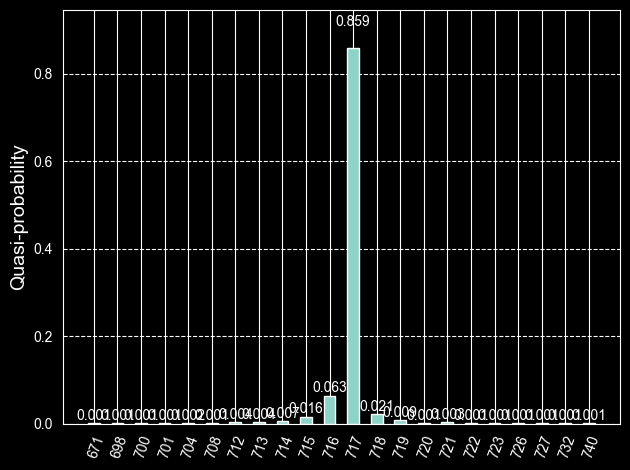

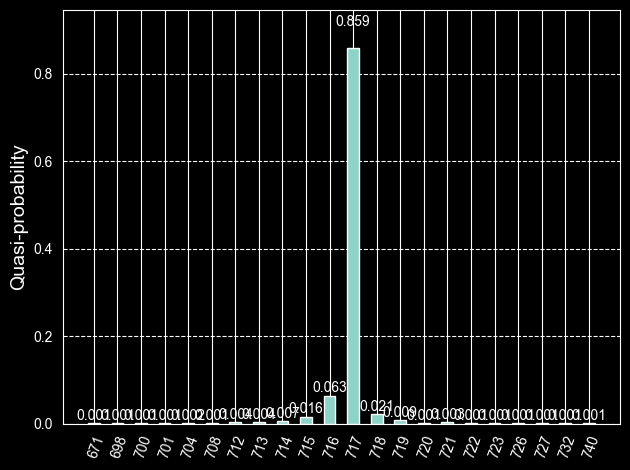

In [8]:
total_shots = sum(counts.values())
quasi_dists = {int(k, 2): v / total_shots for k, v in counts.items()}

display(plot_histogram(quasi_dists))

In [9]:
most_probable = max(quasi_dists, key=quasi_dists.get)

print(f"Most probable output: {most_probable}")
print(f"Estimated theta: {most_probable/2**m}")

Most probable output: 717
Estimated theta: 0.7001953125


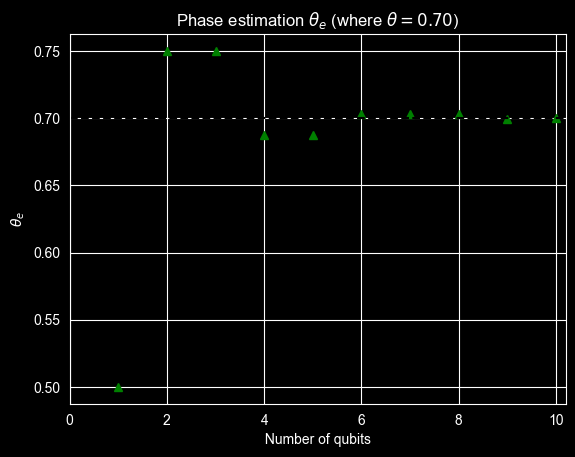

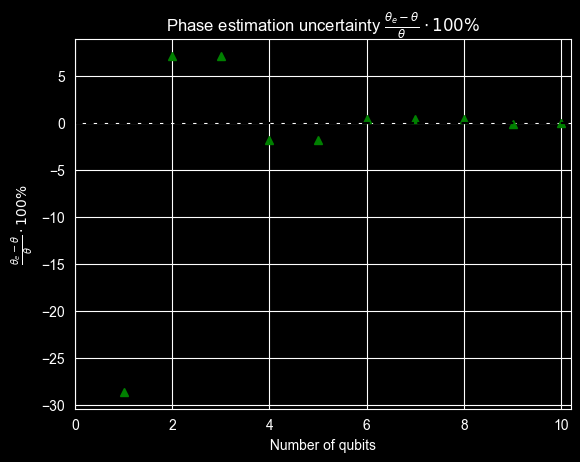

<Figure size 640x480 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
DaneY1=[0.5,0.75,0.75,0.6875,0.6875,0.703125,0.703125,0.703125,0.69921875,0.7001953125]
DaneX=[1,2,3,4,5,6,7,8,9,10]
DaneY2=[]
for i in range(len(DaneY1)):
    DaneYX=((DaneY1[i]-theta)/theta) *100
    DaneY2.append(DaneYX)
plt.title(u'Phase estimation $\\theta_e$ (where $\\theta=0.70$)')
plt.xlabel(r' Number of qubits ')
plt.ylabel(r'$\theta_e$')
plt.xlim([0, m+0.2])
plt.plot(DaneX,DaneY1, 'g^')
plt.hlines(y=0.70,xmin=0.0,xmax=m+0.2, colors='k', linestyles='dashed')
#path and filename of the file to plot:
outputfile = 'Phase_estimation_1_'+str(m)+'.png'
#saves the plot as pdf file in "outputfile":
plt.savefig(outputfile, dpi=300, format='png')  
plt.show()
plt.clf()


plt.title(r'Phase estimation uncertainty $\frac{\theta_e - \theta}{\theta} \cdot 100\%$')
plt.xlabel(r' Number of qubits ')
plt.ylabel(r'$\frac{\theta_e - \theta}{\theta} \cdot 100\%$')
plt.xlim([0, m+0.2])
plt.plot(DaneX,DaneY2, 'g^')
plt.hlines(y=0.0,xmin=0.0,xmax=m+0.2, colors='k', linestyles='dashed')
#path and filename of the file to plot:
outputfile = 'Phase_estimation_2_'+str(m)+'.png'
#saves the plot as pdf file in "outputfile":
plt.savefig(outputfile, dpi=300, format='png')  
plt.show()
plt.clf()

## Execution of Phase Estimation for n=1 to n=10

In [11]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT
from qiskit.primitives import StatevectorSampler
from math import pi

# --- Task 2b: Group 11.45 Configuration ---
theta_true = 0.66
min_qubits = 1
max_qubits = 10

# Lists to store results for Tasks 3a and 3b
data_n = []
data_decimal = []
data_theta_e = []
data_error = []

sampler = StatevectorSampler()

print(f"Running Phase Estimation for Theta = {theta_true} (Group 11.45)")
print("-" * 65)
print(f"{'n (Qubits)':<12} | {'Decimal (d_h)':<15} | {'Theta_e':<15} | {'Error (%)':<15}")
print("-" * 65)

for n in range(min_qubits, max_qubits + 1):
    # 1. Initialize Circuit
    control_register = QuantumRegister(n, name="Control")
    target_register = QuantumRegister(1, name="|ψ>")
    output_register = ClassicalRegister(n, name="Result")
    qc = QuantumCircuit(control_register, target_register, output_register)

    # 2. Prepare eigenstate |ψ> = |1>
    qc.x(target_register)
    qc.barrier()

    # 3. Apply Hadamard to control qubits
    qc.h(control_register)

    # 4. Perform controlled phase rotations
    for index, qubit in enumerate(control_register):
        # We apply the phase gate 2^k times.
        for _ in range(2**index):
            qc.cp(2 * pi * theta_true, qubit, target_register)

    qc.barrier()

    # 5. Inverse Quantum Fourier Transform
    qc.compose(QFT(n, inverse=True), inplace=True)

    # 6. Measure
    qc.measure(control_register, output_register)

    # 7. Execute
    job = sampler.run([(qc,)])
    pub_result = job.result()[0]
    counts = pub_result.data.Result.get_counts()

    # 8. Process Results
    # Find the most probable integer output
    most_probable_bitstring = max(counts, key=counts.get)
    d_h = int(most_probable_bitstring, 2)

    # Calculate Estimated Theta
    theta_e = d_h / (2**n)

    # Calculate Uncertainty/Error percentage
    uncertainty = 100 * (theta_e - theta_true) / theta_true

    # Store data
    data_n.append(n)
    data_decimal.append(d_h)
    data_theta_e.append(theta_e)
    data_error.append(uncertainty)

    # Print Table Row (Task 3a)
    print(f"{n:<12} | {d_h:<15} | {theta_e:<15.6f} | {uncertainty:<15.6f}")

print("-" * 65)

Running Phase Estimation for Theta = 0.66 (Group 11.45)
-----------------------------------------------------------------
n (Qubits)   | Decimal (d_h)   | Theta_e         | Error (%)      
-----------------------------------------------------------------
1            | 1               | 0.500000        | -24.242424     
2            | 3               | 0.750000        | 13.636364      
3            | 5               | 0.625000        | -5.303030      
4            | 11              | 0.687500        | 4.166667       
5            | 21              | 0.656250        | -0.568182      
6            | 42              | 0.656250        | -0.568182      
7            | 84              | 0.656250        | -0.568182      
8            | 169             | 0.660156        | 0.023674       
9            | 338             | 0.660156        | 0.023674       
10           | 676             | 0.660156        | 0.023674       
-----------------------------------------------------------------


/var/folders/rm/d82ssjc14tx1qqkdxrcl5qgm0000gp/T/ipykernel_69921/3834275936.py:52: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.compose(QFT(n, inverse=True), inplace=True)


## Plotting the Uncertainty Graph

Graph saved as Phase_estimation_uncertainty_theta_0.66.png


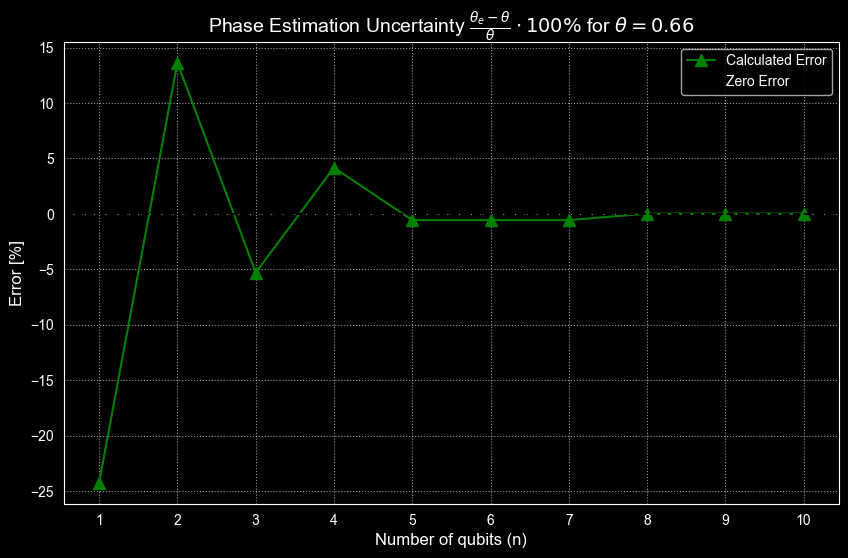

In [12]:
# --- Task 3b: Plotting the Graph ---
plt.figure(figsize=(10, 6))

# Plotting the uncertainty data
plt.plot(data_n, data_error, 'g^-', label='Calculated Error', markersize=8)

# Adding the zero error reference line
plt.axhline(y=0, color='k', linestyle='--', label='Zero Error')

# Labels and Title
plt.title(r'Phase Estimation Uncertainty $\frac{\theta_e - \theta}{\theta} \cdot 100\%$ for $\theta = ' + str(theta_true) + '$', fontsize=14)
plt.xlabel('Number of qubits (n)', fontsize=12)
plt.ylabel(r'Error [%]', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)
plt.xticks(data_n) # Ensure all n values are on x-axis
plt.legend()

# Save and Show
output_img = f'Phase_estimation_uncertainty_theta_{theta_true}.png'
plt.savefig(output_img, dpi=300)
print(f"Graph saved as {output_img}")
plt.show()